# Resume Classification Using NLP  

This project focuses on building an intelligent machine learning model that classifies resumes into predefined job categories such as Software Developer, Data Scientist, and Web Developer. Leveraging Natural Language Processing (NLP) techniques, the system extracts relevant features from text data within resumes to effectively categorize them based on their content. The model will be trained and evaluated on a labeled resume dataset, using supervised classification algorithms.

The project also includes an extension for deploying a simple web application that allows users to upload their resumes and receive immediate job category suggestions. This tool can serve as a valuable aid for both job seekers and recruiters by improving resume screening efficiency and helping candidates better understand their job fit.

Skills utilized include text preprocessing, feature extraction (TF-IDF, embeddings), model selection (e.g., logistic regression, random forest, or deep learning), and deployment of machine learning models in a user-friendly interface.

# Step 1: Data Loading and Initial Exploration

## Overview
The initial phase involves loading the resume dataset and conducting preliminary exploration to understand the structure, quality, and characteristics of the data. This step establishes the foundation for subsequent preprocessing and model development by identifying key features, data distribution, and potential challenges.

## Objectives
- Load the resume dataset from the provided source
- Examine dataset structure including columns, data types, and dimensions
- Analyze the distribution of job categories within the dataset
- Identify missing values, duplicates, and data quality issues
- Generate summary statistics for textual and categorical features
- Visualize key patterns in the data distribution

## Expected Outcomes
The exploration will reveal the dataset's composition, including the number of resume samples per job category, text length distributions, and any preprocessing requirements. This analysis will inform decisions regarding data cleaning strategies, feature engineering approaches, and potential class imbalance handling techniques.

## Technical Approach
The analysis utilizes pandas for data manipulation, matplotlib and seaborn for visualization, and basic text processing libraries to examine resume content characteristics. Statistical summaries and distribution plots will provide insights into data quality and structure.


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Load the dataset
# Note: Replace 'resume_dataset.csv' with the actual filename from your Kaggle dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("Column Names and Data Types:")
print("="*50)
print(df.dtypes)

# Display first few rows
print("\n" + "="*50)
print("First 5 Rows:")
print("="*50)
df.head()


Dataset Shape: (962, 2)

Column Names and Data Types:
Category    object
Resume      object
dtype: object

First 5 Rows:


,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Ja..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scienti...
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machiner..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r..."


In [17]:
# Check for missing values
print("Missing Values Analysis:")
print("="*30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df)

# Display basic statistics
print("\n" + "="*50)
print("Dataset Summary Statistics:")
print("="*50)
df.describe()


Missing Values Analysis:
          Missing Count  Missing Percentage
Category              0                 0.0
Resume                0                 0.0

Dataset Summary Statistics:


,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript...."
freq,84,18


In [18]:
# Analyze the target variable (job categories)
# Note: Replace 'Category' with the actual column name for job categories in your dataset
if 'Category' in df.columns:
    target_col = 'Category'
elif 'Job_Category' in df.columns:
    target_col = 'Job_Category'
else:
    # Display all column names to identify the target column
    print("Available columns:")
    print(df.columns.tolist())
    target_col = input("Please enter the name of the target column (job category): ")

print(f"Target Variable: {target_col}")
print("\n" + "="*50)
print("Job Category Distribution:")
print("="*50)

category_counts = df[target_col].value_counts()
print(category_counts)

# Calculate percentages
category_percentages = df[target_col].value_counts(normalize=True) * 100
print("\n" + "="*30)
print("Job Category Percentages:")
print("="*30)
for cat, pct in category_percentages.items():
    print(f"{cat}: {pct:.2f}%")


Target Variable: Category

Job Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Job Category Percentages:
Java Developer: 8.73%
Testing: 7.28%
DevOps Engineer: 5.72%
Python Developer: 4.99%


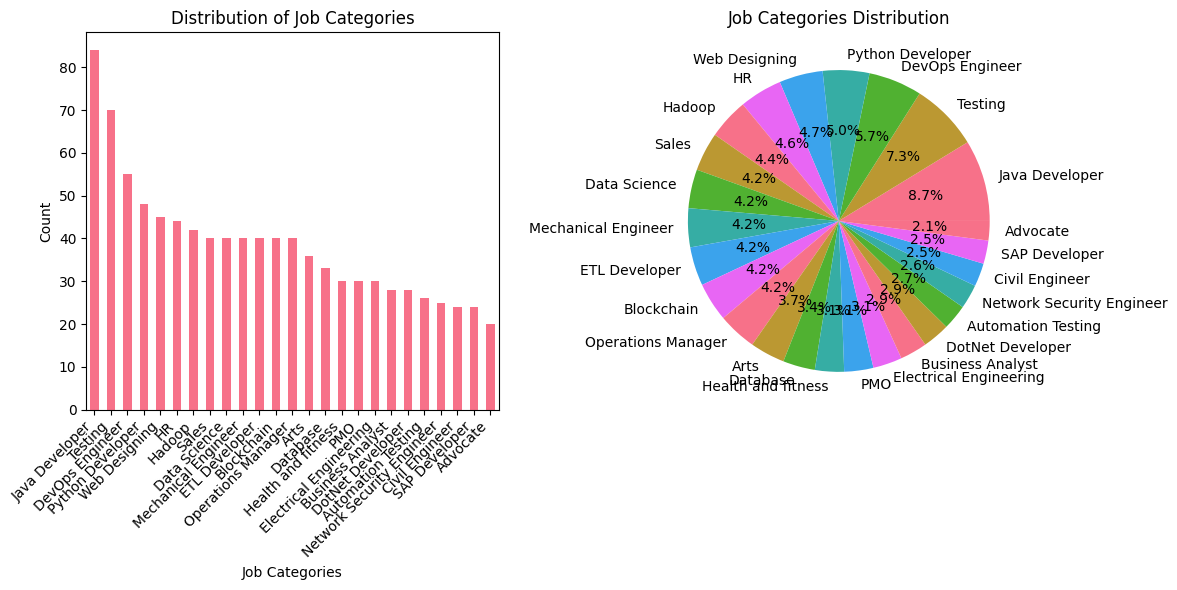

In [19]:
# Visualize the distribution of job categories
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar')
plt.title('Distribution of Job Categories')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Job Categories Distribution')

plt.tight_layout()
plt.show()


In [20]:
# Examine resume text content
# Note: Replace 'Resume_Text' with the actual column name containing resume content
text_columns = [col for col in df.columns if 'text' in col.lower() or 'resume' in col.lower() or 'content' in col.lower()]
print("Potential text columns found:", text_columns)

if text_columns:
    text_col = text_columns[0]  # Use the first text column found
else:
    print("Available columns:")
    print(df.columns.tolist())
    text_col = input("Please enter the name of the column containing resume text: ")

print(f"\nText Column: {text_col}")
print("\n" + "="*50)
print("Resume Text Analysis:")
print("="*50)

# Calculate text length statistics
df['text_length'] = df[text_col].astype(str).apply(len)
df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")
print(f"Minimum text length: {df['text_length'].min()} characters")
print(f"Maximum text length: {df['text_length'].max()} characters")


Potential text columns found: ['Resume']

Text Column: Resume

Resume Text Analysis:
Average text length: 3160 characters
Average word count: 450 words
Minimum text length: 142 characters
Maximum text length: 14816 characters


In [21]:
# Display sample resumes from different categories
print("Sample Resume Examples:")
print("="*50)

# Show one example from each job category
for category in df[target_col].unique()[:3]:  # Show first 3 categories
    print(f"\nCategory: {category}")
    print("-" * 30)
    sample_text = df[df[target_col] == category][text_col].iloc[0]
    # Display first 300 characters to avoid overwhelming output
    print(sample_text[:300] + "..." if len(sample_text) > 300 else sample_text)
    print("\n" + "="*50)


Sample Resume Examples:

Category: Data Science
------------------------------
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language pr...


Category: HR
------------------------------
TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details 
January 2017 MBA  Chidambaram, Tamil Nadu SNS College of Engineering
January 2014 HSC   at SAV Higher Secondary School
 MBA   SNS College of Engineering
 SSLC Finance  at Kamaraj Matriculation School
HR 


Skill Details 
H...


Category: Advocate
------------------------------
TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. OfficeEducation Details 
 LL.B  Guwahati, Assam University Law College, Guwahati University
 B.Sc  Jagiroad, ASSAM, IN Jagiroad College
    Morigaon College
Advocate 

Advocate - Ga

In [22]:
# Create a summary report
print("DATASET EXPLORATION SUMMARY")
print("="*50)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {df.shape[1]}")
print(f"Number of Job Categories: {df[target_col].nunique()}")
print(f"Most Common Category: {category_counts.index[0]} ({category_counts.iloc[0]} records)")
print(f"Least Common Category: {category_counts.index[-1]} ({category_counts.iloc[-1]} records)")
print(f"Average Resume Length: {df['text_length'].mean():.0f} characters")
print(f"Average Word Count: {df['word_count'].mean():.0f} words")
print(f"Missing Values: {df.isnull().sum().sum()} total")
print("="*50)


DATASET EXPLORATION SUMMARY
Total Records: 962
Total Features: 4
Number of Job Categories: 25
Most Common Category: Java Developer (84 records)
Least Common Category: Advocate (20 records)
Average Resume Length: 3160 characters
Average Word Count: 450 words
Missing Values: 0 total


# Step 2: Data Preprocessing and Text Cleaning

## Overview

The data preprocessing phase constitutes a critical component of the resume classification pipeline, focusing on transforming raw resume text into a standardized format suitable for machine learning algorithms. This step involves comprehensive text cleaning, normalization, and preparation activities that directly impact model performance and accuracy.

## Objectives

- Remove irrelevant characters, symbols, and formatting artifacts from resume text
- Standardize text formatting through lowercasing and whitespace normalization
- Eliminate common stopwords that do not contribute to classification decisions
- Apply lemmatization to reduce words to their root forms
- Handle missing values and data inconsistencies
- Create clean, processed text features ready for vectorization
- Validate the preprocessing pipeline through sample text inspection

## Technical Approach

The preprocessing pipeline employs Natural Language Processing techniques including regular expression-based cleaning, tokenization, stopword removal, and lemmatization. Special attention is given to preserving domain-specific terms and technical skills that are crucial for job category classification while removing noise that could hinder model performance.

## Expected Outcomes

This phase will produce a cleaned dataset with standardized text format, reduced vocabulary size, and improved signal-to-noise ratio. The processed text will maintain semantic meaning while being optimized for feature extraction and classification algorithms.


In [28]:
# Import additional libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
from sklearn.preprocessing import LabelEncoder

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng')

print("Required NLTK packages downloaded successfully")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...


Required NLTK packages downloaded successfully


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


In [24]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add custom stopwords specific to resumes
custom_stopwords = {
    'experience', 'work', 'job', 'position', 'role', 'responsibility',
    'company', 'organization', 'team', 'project', 'skill', 'ability',
    'year', 'years', 'month', 'months', 'time', 'good', 'excellent',
    'strong', 'knowledge', 'familiar', 'experience', 'working'
}
stop_words.update(custom_stopwords)

print(f"Total stopwords: {len(stop_words)}")
print("Sample stopwords:", list(stop_words)[:10])


Total stopwords: 221
Sample stopwords: ['at', 'as', 'her', 'by', 'an', 'should', "we've", 'which', 'he', 'myself']


In [25]:
# Define text cleaning functions
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    """
    Comprehensive text cleaning function for resume text
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    
    # Remove phone numbers (various formats)
    text = re.sub(r'(\+\d{1,3}[-.\s]?)?\(?\d{1,4}\)?[-.\s]?\d{1,4}[-.\s]?\d{1,9}', '', text)
    
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text)
    
    # Remove special characters but keep alphanumeric and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s\.\,\;\:\!\?]', ' ', text)
    
    # Remove numbers (optional - comment out if you want to keep numbers)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text(text):
    """
    Complete preprocessing pipeline including tokenization, 
    stopword removal, and lemmatization
    """
    # Clean the text
    text = clean_text(text)
    
    if text == '':
        return ''
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation, keep only alphabetic tokens
    tokens = [token for token in tokens 
              if token.isalpha() and token not in stop_words and len(token) > 2]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)

print("Text preprocessing functions defined successfully")


Text preprocessing functions defined successfully


In [26]:
# Handle missing values in the dataset
print("Handling Missing Values:")
print("="*30)

# Check for missing values before preprocessing
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Fill missing text with empty string
df[text_col] = df[text_col].fillna('')
df[target_col] = df[target_col].fillna('Unknown')

# Remove rows where both text and category are missing/empty
initial_shape = df.shape[0]
df = df[~((df[text_col] == '') & (df[target_col] == 'Unknown'))]
final_shape = df.shape[0]

print(f"Removed {initial_shape - final_shape} rows with missing data")
print(f"Final dataset size: {final_shape} records")


Handling Missing Values:
Missing values before preprocessing:
Category       0
Resume         0
text_length    0
word_count     0
dtype: int64
Removed 0 rows with missing data
Final dataset size: 962 records


In [29]:
# Apply preprocessing to the text data
print("Applying text preprocessing...")
print("This may take a few minutes for large datasets...")

# Create a copy for safety
df_processed = df.copy()

# Apply text cleaning and preprocessing
df_processed['cleaned_text'] = df_processed[text_col].apply(preprocess_text)

# Remove rows where cleaned text is empty
df_processed = df_processed[df_processed['cleaned_text'] != '']

print(f"Preprocessing completed!")
print(f"Records after preprocessing: {len(df_processed)}")

# Calculate new text statistics
df_processed['cleaned_text_length'] = df_processed['cleaned_text'].apply(len)
df_processed['cleaned_word_count'] = df_processed['cleaned_text'].apply(lambda x: len(x.split()) if x else 0)

print(f"Average cleaned text length: {df_processed['cleaned_text_length'].mean():.0f} characters")
print(f"Average cleaned word count: {df_processed['cleaned_word_count'].mean():.0f} words")


Applying text preprocessing...
This may take a few minutes for large datasets...
Preprocessing completed!
Records after preprocessing: 962
Average cleaned text length: 2201 characters
Average cleaned word count: 282 words


In [30]:
# Display before and after examples
print("PREPROCESSING EXAMPLES:")
print("="*50)

for i in range(3):
    if i < len(df_processed):
        category = df_processed[target_col].iloc[i]
        original = df_processed[text_col].iloc[i][:200]  # First 200 chars
        cleaned = df_processed['cleaned_text'].iloc[i][:200]  # First 200 chars
        
        print(f"\nExample {i+1} - Category: {category}")
        print("-" * 30)
        print("ORIGINAL:")
        print(original + "..." if len(str(original)) >= 200 else original)
        print("\nCLEANED:")
        print(cleaned + "..." if len(str(cleaned)) >= 200 else cleaned)
        print("\n" + "="*50)


PREPROCESSING EXAMPLES:

Example 1 - Category: Data Science
------------------------------
ORIGINAL:
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision T...

CLEANED:
skill program language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learn regression svm bayes knn random forest decision tree boost technique cluster analysis w...


Example 2 - Category: Data Science
------------------------------
ORIGINAL:
Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
...

CLEANED:
education detail may may uit rgpv data scientist data scientist matelabs detail python exprience less statsmodels exprience aws exprience less machine learn exprience less sklearn exprience less sc

In [31]:
# Encode target labels
label_encoder = LabelEncoder()
df_processed['category_encoded'] = label_encoder.fit_transform(df_processed[target_col])

# Create mapping dictionary for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print("="*30)
for category, encoded in label_mapping.items():
    print(f"{category}: {encoded}")

# Save the label encoder for later use
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("\nLabel encoder saved to 'label_encoder.pkl'")


Label Encoding Mapping:
Advocate: 0
Arts: 1
Automation Testing: 2
Blockchain: 3
Business Analyst: 4
Civil Engineer: 5
Data Science: 6
Database: 7
DevOps Engineer: 8
DotNet Developer: 9
ETL Developer: 10
Electrical Engineering: 11
HR: 12
Hadoop: 13
Health and fitness: 14
Java Developer: 15
Mechanical Engineer: 16
Network Security Engineer: 17
Operations Manager: 18
PMO: 19
Python Developer: 20
SAP Developer: 21
Sales: 22
Testing: 23
Web Designing: 24

Label encoder saved to 'label_encoder.pkl'


In [32]:
# Analyze vocabulary after preprocessing
print("Vocabulary Analysis After Preprocessing:")
print("="*40)

# Combine all cleaned text
all_text = ' '.join(df_processed['cleaned_text'])
words = all_text.split()

# Get vocabulary statistics
vocabulary = set(words)
word_freq = Counter(words)

print(f"Total words (with repetitions): {len(words):,}")
print(f"Unique vocabulary size: {len(vocabulary):,}")
print(f"Average word frequency: {len(words)/len(vocabulary):.2f}")

# Show most common words
print("\nTop 20 Most Common Words:")
print("-" * 25)
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


Vocabulary Analysis After Preprocessing:
Total words (with repetitions): 271,713
Unique vocabulary size: 5,613
Average word frequency: 48.41

Top 20 Most Common Words:
-------------------------
exprience: 3829
detail: 3156
description: 3122
test: 2687
data: 2148
management: 2024
system: 1944
use: 1858
database: 1533
client: 1472
maharashtra: 1449
service: 1396
application: 1394
technology: 1370
requirement: 1274
business: 1273
report: 1264
process: 1253
design: 1242
development: 1204


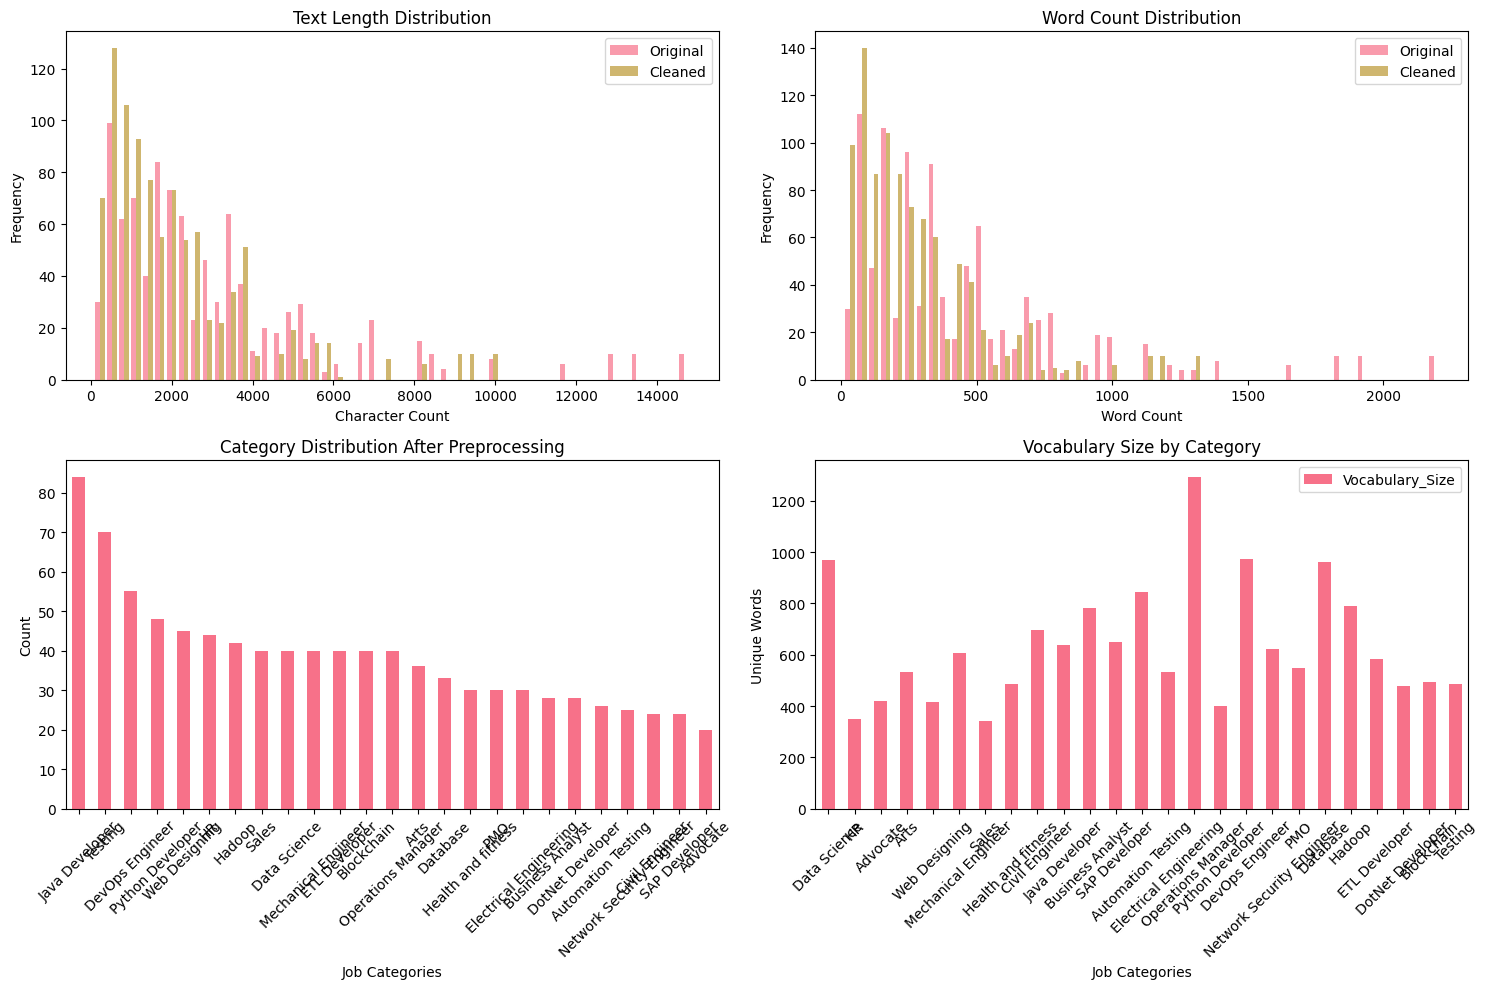

In [33]:
# Visualize preprocessing impact
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length comparison
axes[0, 0].hist([df['text_length'], df_processed['cleaned_text_length']], 
                bins=50, alpha=0.7, label=['Original', 'Cleaned'])
axes[0, 0].set_title('Text Length Distribution')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Word count comparison
axes[0, 1].hist([df['word_count'], df_processed['cleaned_word_count']], 
                bins=50, alpha=0.7, label=['Original', 'Cleaned'])
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Category distribution after preprocessing
df_processed[target_col].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Category Distribution After Preprocessing')
axes[1, 0].set_xlabel('Job Categories')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Vocabulary size by category
category_vocab = {}
for category in df_processed[target_col].unique():
    cat_text = ' '.join(df_processed[df_processed[target_col] == category]['cleaned_text'])
    category_vocab[category] = len(set(cat_text.split()))

vocab_df = pd.DataFrame(list(category_vocab.items()), columns=['Category', 'Vocabulary_Size'])
vocab_df.plot(x='Category', y='Vocabulary_Size', kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Vocabulary Size by Category')
axes[1, 1].set_xlabel('Job Categories')
axes[1, 1].set_ylabel('Unique Words')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [34]:
# Save preprocessed data
df_processed.to_csv('preprocessed_resume_dataset.csv', index=False)

# Create summary report
print("PREPROCESSING SUMMARY REPORT")
print("="*50)
print(f"Original dataset size: {len(df):,} records")
print(f"Processed dataset size: {len(df_processed):,} records")
print(f"Records removed: {len(df) - len(df_processed):,}")
print(f"Original avg text length: {df['text_length'].mean():.0f} characters")
print(f"Cleaned avg text length: {df_processed['cleaned_text_length'].mean():.0f} characters")
print(f"Text length reduction: {((df['text_length'].mean() - df_processed['cleaned_text_length'].mean()) / df['text_length'].mean() * 100):.1f}%")
print(f"Original vocabulary size: {len(set(' '.join(df[text_col].fillna('')).split())):,} words")
print(f"Cleaned vocabulary size: {len(vocabulary):,} words")
print(f"Vocabulary reduction: {((len(set(' '.join(df[text_col].fillna('')).split())) - len(vocabulary)) / len(set(' '.join(df[text_col].fillna('')).split())) * 100):.1f}%")
print(f"Number of categories: {df_processed[target_col].nunique()}")
print("="*50)
print("Data preprocessing completed successfully!")


PREPROCESSING SUMMARY REPORT
Original dataset size: 962 records
Processed dataset size: 962 records
Records removed: 0
Original avg text length: 3160 characters
Cleaned avg text length: 2201 characters
Text length reduction: 30.4%
Original vocabulary size: 14,281 words
Cleaned vocabulary size: 5,613 words
Vocabulary reduction: 60.7%
Number of categories: 25
Data preprocessing completed successfully!


# Step 3: Feature Engineering and Text Vectorization

## Overview

The feature engineering phase transforms preprocessed text data into numerical representations that machine learning algorithms can effectively process. This step involves implementing various text vectorization techniques to convert resume content into feature vectors while preserving semantic relationships and contextual information relevant for job category classification.

## Objectives

- Apply multiple text vectorization techniques including TF-IDF, Count Vectorization, and N-gram analysis
- Optimize feature extraction parameters through systematic parameter tuning
- Generate feature matrices with appropriate dimensionality for model training
- Implement feature selection techniques to identify the most discriminative features
- Create additional engineered features based on resume characteristics
- Evaluate and compare different vectorization approaches for classification performance
- Prepare feature sets for train-test splitting and model development

## Technical Approach

The feature engineering pipeline employs a multi-faceted approach combining traditional bag-of-words models with advanced TF-IDF weighting schemes. N-gram analysis captures sequential word patterns while feature selection algorithms identify the most informative terms for classification. Additional handcrafted features based on resume structure and content characteristics supplement the text-based features.

## Expected Outcomes

This phase will produce optimized feature matrices that effectively represent resume content for classification tasks. The resulting feature sets will balance dimensionality constraints with information retention, providing robust input for subsequent machine learning model training and evaluation.


In [35]:
# Import required libraries for feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import scipy.sparse as sp
from wordcloud import WordCloud

print("Feature engineering libraries imported successfully")


Feature engineering libraries imported successfully


In [36]:
# Create additional handcrafted features
def extract_resume_features(text, original_text):
    """
    Extract additional features from resume text
    """
    features = {}
    
    # Text length features
    features['char_count'] = len(str(text))
    features['word_count'] = len(str(text).split())
    features['sentence_count'] = len(str(text).split('.'))
    features['avg_word_length'] = np.mean([len(word) for word in str(text).split()])
    
    # Original text features (before preprocessing)
    original_str = str(original_text).lower()
    
    # Education indicators
    education_keywords = ['university', 'college', 'degree', 'bachelor', 'master', 'phd', 'diploma', 'certification']
    features['education_mentions'] = sum(1 for keyword in education_keywords if keyword in original_str)
    
    # Experience indicators
    experience_keywords = ['experience', 'worked', 'years', 'months', 'intern', 'internship', 'job', 'position']
    features['experience_mentions'] = sum(1 for keyword in experience_keywords if keyword in original_str)
    
    # Technical skills indicators
    technical_keywords = ['python', 'java', 'sql', 'javascript', 'html', 'css', 'machine learning', 'data science', 'programming']
    features['technical_skills'] = sum(1 for keyword in technical_keywords if keyword in original_str)
    
    # Contact information (presence indicators)
    features['has_email'] = 1 if '@' in original_str else 0
    features['has_phone'] = 1 if any(char.isdigit() for char in original_str) else 0
    
    # Professional keywords
    professional_keywords = ['manage', 'lead', 'develop', 'design', 'analyze', 'implement', 'coordinate']
    features['professional_action_words'] = sum(1 for keyword in professional_keywords if keyword in text)
    
    return features

# Apply feature extraction to all resumes
print("Extracting handcrafted features...")

feature_list = []
for idx, row in df_processed.iterrows():
    features = extract_resume_features(row['cleaned_text'], row[text_col])
    features['index'] = idx
    feature_list.append(features)

# Create DataFrame from features
additional_features_df = pd.DataFrame(feature_list)
additional_features_df.set_index('index', inplace=True)

print("Handcrafted features extracted successfully")
print(f"Number of additional features: {len(additional_features_df.columns)}")
print("Feature columns:", additional_features_df.columns.tolist())


Extracting handcrafted features...
Handcrafted features extracted successfully
Number of additional features: 10
Feature columns: ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'education_mentions', 'experience_mentions', 'technical_skills', 'has_email', 'has_phone', 'professional_action_words']


In [37]:
# Initialize different vectorizers
vectorizers = {
    'count': CountVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.8,
        stop_words='english'
    ),
    'tfidf': TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.8,
        stop_words='english',
        sublinear_tf=True
    ),
    'tfidf_char': TfidfVectorizer(
        max_features=3000,
        analyzer='char_wb',
        ngram_range=(3, 5),
        min_df=2,
        max_df=0.8
    )
}

print("Vectorizers initialized:")
for name, vectorizer in vectorizers.items():
    print(f"- {name}: {type(vectorizer).__name__}")


Vectorizers initialized:
- count: CountVectorizer
- tfidf: TfidfVectorizer
- tfidf_char: TfidfVectorizer


In [38]:
# Apply vectorization techniques
feature_matrices = {}
feature_names = {}

print("Applying vectorization techniques...")
print("="*40)

for name, vectorizer in vectorizers.items():
    print(f"Processing {name} vectorization...")
    
    # Fit and transform the text data
    X_vectorized = vectorizer.fit_transform(df_processed['cleaned_text'])
    
    # Store results
    feature_matrices[name] = X_vectorized
    feature_names[name] = vectorizer.get_feature_names_out()
    
    print(f"- Shape: {X_vectorized.shape}")
    print(f"- Sparsity: {(1 - X_vectorized.nnz / (X_vectorized.shape[0] * X_vectorized.shape[1])):.4f}")
    print(f"- Feature names sample: {list(feature_names[name][:5])}")
    print()

print("Vectorization completed successfully")


Applying vectorization techniques...
Processing count vectorization...
- Shape: (962, 5000)
- Sparsity: 0.9645
- Feature names sample: ['abacus', 'abacus electronics', 'abap', 'abap developer', 'ability']

Processing tfidf vectorization...
- Shape: (962, 5000)
- Sparsity: 0.9645
- Feature names sample: ['abacus', 'abacus electronics', 'abap', 'abap developer', 'ability']

Processing tfidf_char vectorization...
- Shape: (962, 3000)
- Sparsity: 0.6684
- Feature names sample: [' ac', ' acc', ' acce', ' acco', ' ach']

Vectorization completed successfully


In [39]:
# Analyze feature importance using different methods
def analyze_feature_importance(X, y, feature_names, method='chi2', k=20):
    """
    Analyze feature importance using statistical methods
    """
    if method == 'chi2':
        selector = SelectKBest(chi2, k=k)
    elif method == 'mutual_info':
        selector = SelectKBest(mutual_info_classif, k=k)
    
    X_selected = selector.fit_transform(X, y)
    selected_features = feature_names[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    
    return selected_features, scores, selector

# Analyze feature importance for TF-IDF vectorization
print("Feature Importance Analysis:")
print("="*30)

y = df_processed['category_encoded']

# Chi-square test
selected_features_chi2, scores_chi2, selector_chi2 = analyze_feature_importance(
    feature_matrices['tfidf'], y, feature_names['tfidf'], 'chi2', k=30
)

print("Top 20 features by Chi-square test:")
for i, (feature, score) in enumerate(zip(selected_features_chi2[:20], scores_chi2[:20])):
    print(f"{i+1:2d}. {feature:20s} (score: {score:.2f})")

# Mutual information
selected_features_mi, scores_mi, selector_mi = analyze_feature_importance(
    feature_matrices['tfidf'], y, feature_names['tfidf'], 'mutual_info', k=30
)

print("\nTop 20 features by Mutual Information:")
for i, (feature, score) in enumerate(zip(selected_features_mi[:20], scores_mi[:20])):
    print(f"{i+1:2d}. {feature:20s} (score: {score:.3f})")


Feature Importance Analysis:
Top 20 features by Chi-square test:
 1. advocate             (score: 245.46)
 2. art                  (score: 172.57)
 3. blockchain           (score: 166.61)
 4. cisco                (score: 137.30)
 5. civil                (score: 230.93)
 6. civil engineer       (score: 189.65)
 7. court                (score: 153.56)
 8. data science         (score: 120.95)
 9. dot                  (score: 114.43)
10. dot net              (score: 136.17)
11. electrical           (score: 125.94)
12. etl                  (score: 128.10)
13. firewall             (score: 143.15)
14. fitness              (score: 138.17)
15. hadoop               (score: 157.83)
16. hdfs                 (score: 114.63)
17. hive                 (score: 130.21)
18. informatica          (score: 115.33)
19. java developer       (score: 126.99)
20. law                  (score: 175.22)

Top 20 features by Mutual Information:
 1. application          (score: 1.425)
 2. base                 (score: 1.

In [40]:
# Apply dimensionality reduction using SVD
print("Applying dimensionality reduction...")

# Apply TruncatedSVD to reduce dimensionality while preserving information
svd_components = [100, 200, 300]
svd_results = {}

for n_components in svd_components:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_svd = svd.fit_transform(feature_matrices['tfidf'])
    
    svd_results[n_components] = {
        'transformer': svd,
        'features': X_svd,
        'explained_variance_ratio': svd.explained_variance_ratio_.sum()
    }
    
    print(f"SVD with {n_components} components:")
    print(f"- Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")
    print(f"- Shape: {X_svd.shape}")

# Select optimal number of components
optimal_components = 200  # Based on explained variance vs complexity trade-off
X_svd_final = svd_results[optimal_components]['features']
svd_final = svd_results[optimal_components]['transformer']

print(f"\nSelected {optimal_components} SVD components for final features")


Applying dimensionality reduction...
SVD with 100 components:
- Explained variance ratio: 0.8362
- Shape: (962, 100)
SVD with 200 components:
- Explained variance ratio: 1.0000
- Shape: (962, 200)
SVD with 300 components:
- Explained variance ratio: 1.0000
- Shape: (962, 300)

Selected 200 SVD components for final features


In [41]:
# Combine different feature types
print("Combining feature sets...")

# Normalize additional features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
additional_features_scaled = scaler.fit_transform(additional_features_df)

# Create combined feature matrices
feature_combinations = {
    'tfidf_only': feature_matrices['tfidf'],
    'tfidf_selected': selector_chi2.transform(feature_matrices['tfidf']),
    'tfidf_svd': X_svd_final,
    'count_only': feature_matrices['count'],
    'char_ngram': feature_matrices['tfidf_char']
}

# Add handcrafted features to TF-IDF features
tfidf_with_features = sp.hstack([
    feature_matrices['tfidf'],
    sp.csr_matrix(additional_features_scaled)
])

feature_combinations['tfidf_plus_features'] = tfidf_with_features

# Display combination results
print("Feature combination summary:")
print("-" * 30)
for name, features in feature_combinations.items():
    print(f"{name:20s}: {features.shape}")


Combining feature sets...
Feature combination summary:
------------------------------
tfidf_only          : (962, 5000)
tfidf_selected      : (962, 30)
tfidf_svd           : (962, 200)
count_only          : (962, 5000)
char_ngram          : (962, 3000)
tfidf_plus_features : (962, 5010)


Generating word clouds for visualization...


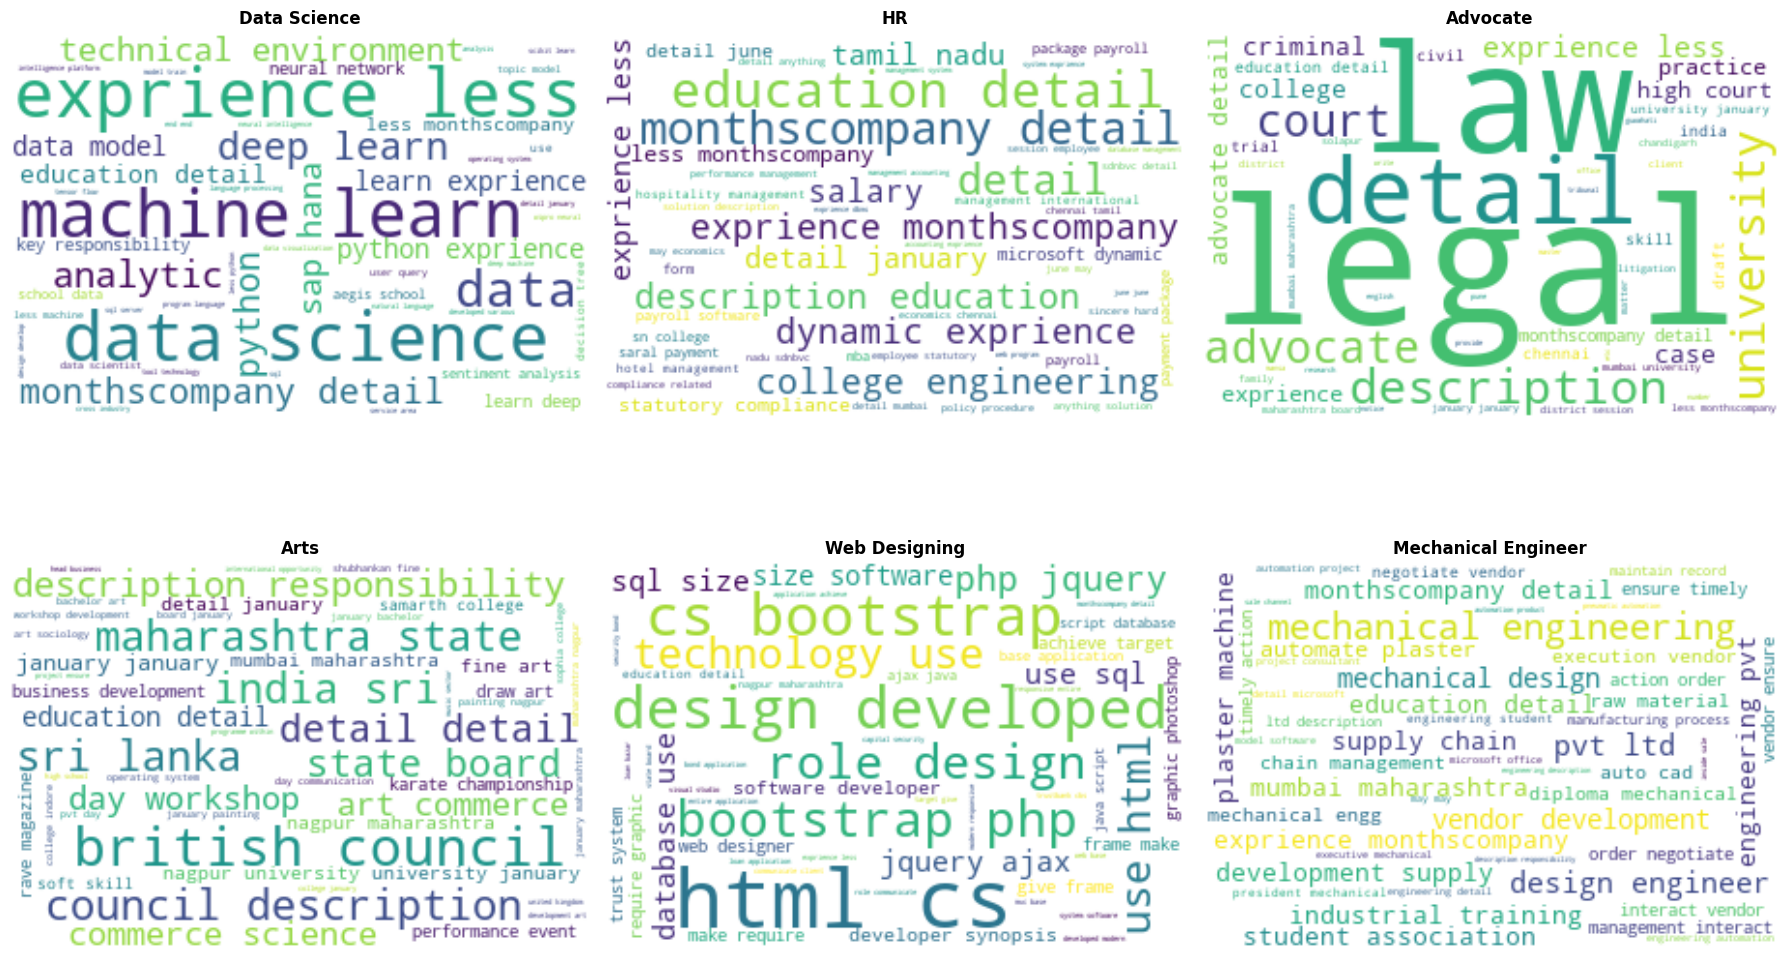

In [42]:
# Create word clouds for different job categories
print("Generating word clouds for visualization...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

categories = df_processed[target_col].unique()[:6]  # Show first 6 categories

for i, category in enumerate(categories):
    if i < len(axes):
        # Get text for this category
        category_text = ' '.join(df_processed[df_processed[target_col] == category]['cleaned_text'])
        
        if len(category_text.strip()) > 0:
            # Create word cloud
            wordcloud = WordCloud(
                width=300, height=200, 
                background_color='white',
                max_words=50,
                colormap='viridis'
            ).generate(category_text)
            
            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'{category}', fontsize=12, fontweight='bold')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'No data', ha='center', va='center')
            axes[i].set_title(f'{category}', fontsize=12)

# Remove empty subplots
for i in range(len(categories), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [43]:
# Split data for model training
print("Preparing train-test splits...")

# Use the TF-IDF + handcrafted features as the primary feature set
X_primary = feature_combinations['tfidf_plus_features']
y_primary = df_processed['category_encoded']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_primary, y_primary, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_primary
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    category_name = label_encoder.inverse_transform([idx])[0]
    print(f"  {category_name}: {count}")


Preparing train-test splits...
Training set shape: (769, 5010)
Test set shape: (193, 5010)
Training set class distribution:
  Advocate: 16
  Arts: 29
  Automation Testing: 21
  Blockchain: 32
  Business Analyst: 22
  Civil Engineer: 19
  Data Science: 32
  Database: 26
  DevOps Engineer: 44
  DotNet Developer: 23
  ETL Developer: 32
  Electrical Engineering: 24
  HR: 35
  Hadoop: 34
  Health and fitness: 24
  Java Developer: 67
  Mechanical Engineer: 32
  Network Security Engineer: 20
  Operations Manager: 32
  PMO: 24
  Python Developer: 38
  SAP Developer: 19
  Sales: 32
  Testing: 56
  Web Designing: 36


In [44]:
# Save feature engineering artifacts
print("Saving feature engineering artifacts...")

# Save vectorizers
import joblib

joblib.dump(vectorizers['tfidf'], 'tfidf_vectorizer.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(svd_final, 'svd_transformer.pkl')
joblib.dump(selector_chi2, 'feature_selector.pkl')

# Save feature matrices (using pickle for sparse matrices)
import pickle

with open('feature_matrices.pkl', 'wb') as f:
    pickle.dump(feature_combinations, f)

# Save train-test splits
with open('train_test_data.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }, f)

print("Feature engineering artifacts saved successfully")


Saving feature engineering artifacts...
Feature engineering artifacts saved successfully


In [45]:
# Feature engineering summary report
print("FEATURE ENGINEERING SUMMARY REPORT")
print("="*50)
print(f"Original vocabulary size: {len(feature_names['tfidf']):,} features")
print(f"Selected features (Chi2): {len(selected_features_chi2)} features")
print(f"SVD components: {optimal_components} components")
print(f"Handcrafted features: {additional_features_df.shape[1]} features")
print(f"Primary feature matrix: {X_primary.shape}")
print(f"Matrix sparsity: {(1 - X_primary.nnz / (X_primary.shape[0] * X_primary.shape[1])):.4f}")
print()
print("Vectorization methods applied:")
for name, matrix in feature_combinations.items():
    print(f"  - {name}: {matrix.shape}")
print()
print("Train-test split:")
print(f"  - Training samples: {X_train.shape[0]:,}")
print(f"  - Test samples: {X_test.shape[0]:,}")
print(f"  - Feature dimensionality: {X_train.shape[1]:,}")
print()
print("Top discriminative features:")
for i, feature in enumerate(selected_features_chi2[:10]):
    print(f"  {i+1:2d}. {feature}")
print("="*50)
print("Feature engineering completed successfully!")


FEATURE ENGINEERING SUMMARY REPORT
Original vocabulary size: 5,000 features
Selected features (Chi2): 30 features
SVD components: 200 components
Handcrafted features: 10 features
Primary feature matrix: (962, 5010)
Matrix sparsity: 0.9628

Vectorization methods applied:
  - tfidf_only: (962, 5000)
  - tfidf_selected: (962, 30)
  - tfidf_svd: (962, 200)
  - count_only: (962, 5000)
  - char_ngram: (962, 3000)
  - tfidf_plus_features: (962, 5010)

Train-test split:
  - Training samples: 769
  - Test samples: 193
  - Feature dimensionality: 5,010

Top discriminative features:
   1. advocate
   2. art
   3. blockchain
   4. cisco
   5. civil
   6. civil engineer
   7. court
   8. data science
   9. dot
  10. dot net
Feature engineering completed successfully!


# Step 4: Model Selection and Training

## Overview

The model selection and training phase involves implementing and evaluating multiple machine learning algorithms to identify the optimal classifier for resume categorization. This step encompasses systematic model comparison, hyperparameter optimization, and performance evaluation across different feature representations to establish the most effective classification pipeline.

## Objectives

- Implement diverse machine learning algorithms including Naive Bayes, Support Vector Machines, Random Forest, and Gradient Boosting
- Conduct hyperparameter tuning using grid search and cross-validation techniques
- Evaluate model performance across different feature combinations (TF-IDF only, selected features, SVD-reduced features)
- Apply ensemble methods to improve classification accuracy
- Assess model performance using multiple evaluation metrics including accuracy, precision, recall, and F1-score
- Identify the best-performing model configuration for deployment
- Analyze feature importance and model interpretability

## Technical Approach

The training pipeline employs a comprehensive model comparison framework utilizing stratified cross-validation to ensure robust performance estimates. Hyperparameter optimization is conducted through systematic grid search across algorithm-specific parameter spaces. Model evaluation incorporates both macro and micro-averaged metrics to account for class imbalance considerations inherent in the resume dataset.

## Expected Outcomes

This phase will produce a trained, optimized machine learning model capable of accurately classifying resumes into predefined job categories. The selected model will demonstrate superior performance metrics and generalization capability, ready for integration into the final classification system.


In [46]:
# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_recall_fscore_support,
                            roc_auc_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier
import time
import joblib

print("Machine learning libraries imported successfully")
print("Available feature combinations:", list(feature_combinations.keys()))


Machine learning libraries imported successfully
Available feature combinations: ['tfidf_only', 'tfidf_selected', 'tfidf_svd', 'count_only', 'char_ngram', 'tfidf_plus_features']


In [47]:
# Load train-test data
with open('train_test_data.pkl', 'rb') as f:
    data = pickle.load(f)
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']

print(f"Loaded training data: {X_train.shape}")
print(f"Loaded test data: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Get class names for better reporting
class_names = label_encoder.classes_
print("Class labels:", class_names)


Loaded training data: (769, 5010)
Loaded test data: (193, 5010)
Number of classes: 25
Class labels: ['Advocate' 'Arts' 'Automation Testing' 'Blockchain' 'Business Analyst'
 'Civil Engineer' 'Data Science' 'Database' 'DevOps Engineer'
 'DotNet Developer' 'ETL Developer' 'Electrical Engineering' 'HR' 'Hadoop'
 'Health and fitness' 'Java Developer' 'Mechanical Engineer'
 'Network Security Engineer' 'Operations Manager' 'PMO' 'Python Developer'
 'SAP Developer' 'Sales' 'Testing' 'Web Designing']


In [48]:
# Define base models with initial parameters
base_models = {
    'naive_bayes': MultinomialNB(),
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'random_forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'svm_linear': SVC(kernel='linear', random_state=42, probability=True),
    'svm_rbf': SVC(kernel='rbf', random_state=42, probability=True),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'knn': KNeighborsClassifier()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'naive_bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'logistic_regression': {
        'C': [0.1, 1.0, 10.0, 100.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'random_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'svm_linear': {
        'C': [0.1, 1.0, 10.0, 100.0]
    },
    'svm_rbf': {
        'C': [0.1, 1.0, 10.0],
        'gamma': ['scale', 'auto', 0.01, 0.1]
    },
    'gradient_boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

print("Base models and parameter grids defined")
print("Models to evaluate:", list(base_models.keys()))


Base models and parameter grids defined
Models to evaluate: ['naive_bayes', 'logistic_regression', 'random_forest', 'svm_linear', 'svm_rbf', 'gradient_boosting', 'knn']


In [49]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive model evaluation function
    """
    results = {}
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'training_time': training_time,
        'prediction_time': prediction_time,
        'y_pred': y_pred,
        'model': model
    }
    
    return results

# Quick baseline evaluation with default parameters
print("Baseline Model Performance (Default Parameters):")
print("="*50)

baseline_results = {}

for name, model in base_models.items():
    print(f"Evaluating {name}...")
    
    # Use different feature combinations for different models
    if 'svm' in name:
        # Use reduced features for SVM (computational efficiency)
        X_train_model = feature_combinations['tfidf_svd'][:X_train.shape[0]]
        X_test_model = feature_combinations['tfidf_svd'][X_train.shape[0]:]
    elif 'knn' in name:
        # Use selected features for KNN
        X_train_model = feature_combinations['tfidf_selected'][:X_train.shape[0]]
        X_test_model = feature_combinations['tfidf_selected'][X_train.shape[0]:]
    else:
        # Use full feature set for tree-based and linear models
        X_train_model = X_train
        X_test_model = X_test
    
    try:
        results = evaluate_model(model, X_train_model, X_test_model, y_train, y_test, name)
        baseline_results[name] = results
        
        print(f"  Accuracy: {results['accuracy']:.4f}")
        print(f"  F1-Score: {results['f1_score']:.4f}")
        print(f"  CV Score: {results['cv_mean']:.4f} (+/- {results['cv_std']:.4f})")
        print(f"  Training Time: {results['training_time']:.2f}s")
        print()
        
    except Exception as e:
        print(f"  Error: {str(e)}")
        print()

# Sort results by F1-score
sorted_results = sorted(baseline_results.items(), key=lambda x: x[1]['f1_score'], reverse=True)
print("Baseline Rankings (by F1-Score):")
for i, (name, results) in enumerate(sorted_results):
    print(f"{i+1:2d}. {name:20s}: {results['f1_score']:.4f}")


Baseline Model Performance (Default Parameters):
Evaluating naive_bayes...
  Error: Negative values in data passed to MultinomialNB (input X).

Evaluating logistic_regression...
  Accuracy: 0.9948
  F1-Score: 0.9949
  CV Score: 0.9623 (+/- 0.0075)
  Training Time: 0.43s

Evaluating random_forest...
  Accuracy: 0.9948
  F1-Score: 0.9949
  CV Score: 0.9922 (+/- 0.0049)
  Training Time: 0.11s

Evaluating svm_linear...
  Accuracy: 0.0829
  F1-Score: 0.0142
  CV Score: 0.0390 (+/- 0.0109)
  Training Time: 0.18s

Evaluating svm_rbf...
  Accuracy: 0.0829
  F1-Score: 0.0142
  CV Score: 0.0429 (+/- 0.0106)
  Training Time: 0.26s

Evaluating gradient_boosting...
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 0.9948 (+/- 0.0064)
  Training Time: 35.01s

Evaluating knn...
  Accuracy: 0.0311
  F1-Score: 0.0083
  CV Score: 0.0260 (+/- 0.0109)
  Training Time: 0.00s

Baseline Rankings (by F1-Score):
 1. gradient_boosting   : 1.0000
 2. random_forest       : 0.9949
 3. logistic_regression : 0.9949


In [50]:
# Hyperparameter tuning for top 3 performing models
print("Hyperparameter Tuning:")
print("="*30)

# Select top 3 models for detailed tuning
top_models = [name for name, _ in sorted_results[:3]]
print("Selected models for tuning:", top_models)

tuned_results = {}

for model_name in top_models:
    print(f"\nTuning {model_name}...")
    
    # Get appropriate feature set
    if 'svm' in model_name:
        X_train_model = feature_combinations['tfidf_svd'][:X_train.shape[0]]
        X_test_model = feature_combinations['tfidf_svd'][X_train.shape[0]:]
    elif 'knn' in model_name:
        X_train_model = feature_combinations['tfidf_selected'][:X_train.shape[0]]
        X_test_model = feature_combinations['tfidf_selected'][X_train.shape[0]:]
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Setup grid search
    model = base_models[model_name]
    param_grid = param_grids[model_name]
    
    # Use smaller parameter grid for complex models to save time
    if model_name == 'random_forest':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=0
    )
    
    try:
        start_time = time.time()
        grid_search.fit(X_train_model, y_train)
        tuning_time = time.time() - start_time
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        results = evaluate_model(best_model, X_train_model, X_test_model, y_train, y_test, model_name)
        results['best_params'] = grid_search.best_params_
        results['best_cv_score'] = grid_search.best_score_
        results['tuning_time'] = tuning_time
        
        tuned_results[model_name] = results
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  Best CV score: {grid_search.best_score_:.4f}")
        print(f"  Test accuracy: {results['accuracy']:.4f}")
        print(f"  Test F1-score: {results['f1_score']:.4f}")
        print(f"  Tuning time: {tuning_time:.1f}s")
        
    except Exception as e:
        print(f"  Error during tuning: {str(e)}")

print("\nHyperparameter tuning completed")


Hyperparameter Tuning:
Selected models for tuning: ['gradient_boosting', 'random_forest', 'logistic_regression']

Tuning gradient_boosting...
  Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
  Best CV score: 0.9893
  Test accuracy: 0.9948
  Test F1-score: 0.9949
  Tuning time: 300.0s

Tuning random_forest...
  Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
  Best CV score: 0.9837
  Test accuracy: 0.9948
  Test F1-score: 0.9948
  Tuning time: 1.1s

Tuning logistic_regression...
  Best parameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
  Best CV score: 0.9919
  Test accuracy: 0.9948
  Test F1-score: 0.9949
  Tuning time: 1.0s

Hyperparameter tuning completed


In [51]:
# Select best model and create detailed evaluation
print("Best Model Selection and Detailed Evaluation:")
print("="*50)

# Find best tuned model
if tuned_results:
    best_model_name = max(tuned_results.items(), key=lambda x: x[1]['f1_score'])[0]
    best_model_results = tuned_results[best_model_name]
    best_model = best_model_results['model']
else:
    best_model_name = sorted_results[0][0]
    best_model_results = sorted_results[0][1]
    best_model = best_model_results['model']

print(f"Selected best model: {best_model_name}")
print(f"Best model parameters: {best_model_results.get('best_params', 'Default parameters')}")
print()

# Generate detailed classification report
y_pred_best = best_model_results['y_pred']
class_report = classification_report(y_test, y_pred_best, target_names=class_names, digits=4)
print("Detailed Classification Report:")
print("-" * 40)
print(class_report)


Best Model Selection and Detailed Evaluation:
Selected best model: gradient_boosting
Best model parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Detailed Classification Report:
----------------------------------------
                           precision    recall  f1-score   support

                 Advocate     1.0000    1.0000    1.0000         4
                     Arts     1.0000    1.0000    1.0000         7
       Automation Testing     0.8333    1.0000    0.9091         5
               Blockchain     1.0000    1.0000    1.0000         8
         Business Analyst     1.0000    1.0000    1.0000         6
           Civil Engineer     1.0000    1.0000    1.0000         5
             Data Science     1.0000    1.0000    1.0000         8
                 Database     1.0000    1.0000    1.0000         7
          DevOps Engineer     1.0000    0.9091    0.9524        11
         DotNet Developer     1.0000    1.0000    1.0000         5
            ETL Dev

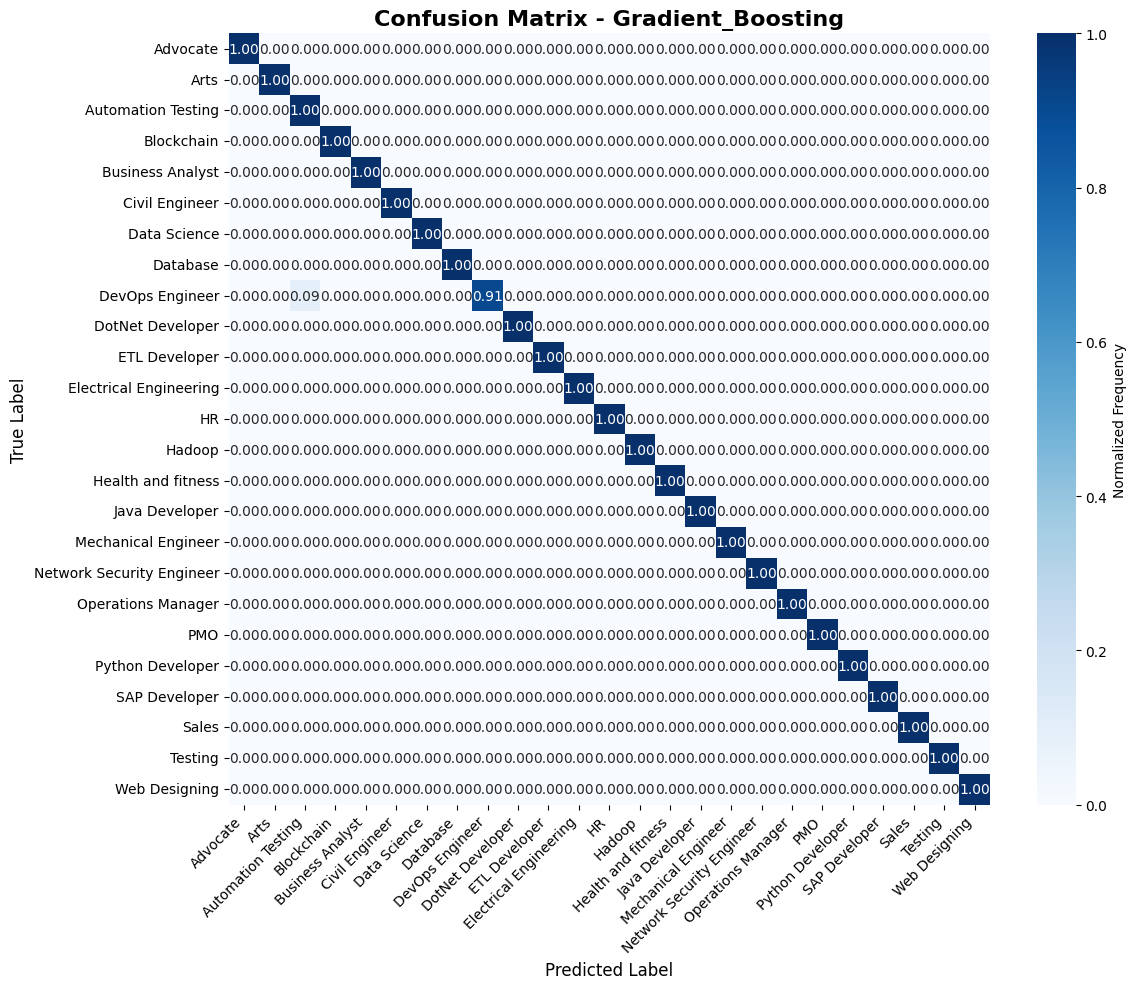

Confusion Matrix Analysis:
------------------------------
Advocate            : Precision=1.000, Recall=1.000
Arts                : Precision=1.000, Recall=1.000
Automation Testing  : Precision=0.833, Recall=1.000
Blockchain          : Precision=1.000, Recall=1.000
Business Analyst    : Precision=1.000, Recall=1.000
Civil Engineer      : Precision=1.000, Recall=1.000
Data Science        : Precision=1.000, Recall=1.000
Database            : Precision=1.000, Recall=1.000
DevOps Engineer     : Precision=1.000, Recall=0.909
DotNet Developer    : Precision=1.000, Recall=1.000
ETL Developer       : Precision=1.000, Recall=1.000
Electrical Engineering: Precision=1.000, Recall=1.000
HR                  : Precision=1.000, Recall=1.000
Hadoop              : Precision=1.000, Recall=1.000
Health and fitness  : Precision=1.000, Recall=1.000
Java Developer      : Precision=1.000, Recall=1.000
Mechanical Engineer : Precision=1.000, Recall=1.000
Network Security Engineer: Precision=1.000, Recall=1.000

In [52]:
# Create confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create visualization
plt.figure(figsize=(12, 10))

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Normalized Frequency'})

plt.title(f'Confusion Matrix - {best_model_name.title()}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print confusion matrix statistics
print("Confusion Matrix Analysis:")
print("-" * 30)
for i, class_name in enumerate(class_names):
    true_positive = cm[i, i]
    false_positive = cm[:, i].sum() - true_positive
    false_negative = cm[i, :].sum() - true_positive
    
    if (true_positive + false_positive) > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 0
        
    if (true_positive + false_negative) > 0:
        recall = true_positive / (true_positive + false_negative)
    else:
        recall = 0
    
    print(f"{class_name:20s}: Precision={precision:.3f}, Recall={recall:.3f}")


Feature Importance Analysis:
Top 20 most important features:
               feature  importance
        java developer    0.077215
                devops    0.057056
      python developer    0.050496
                  test    0.044248
            blockchain    0.042289
              designer    0.039501
database administrator    0.033790
                   art    0.032653
          data science    0.028833
                   pmo    0.027333
mechanical engineering    0.026449
            automation    0.026383
      business analyst    0.025508
                  sale    0.024545
         net developer    0.024150
     manager operation    0.023988
            electrical    0.022896
             education    0.022179
         etl developer    0.021503
                   etl    0.020786


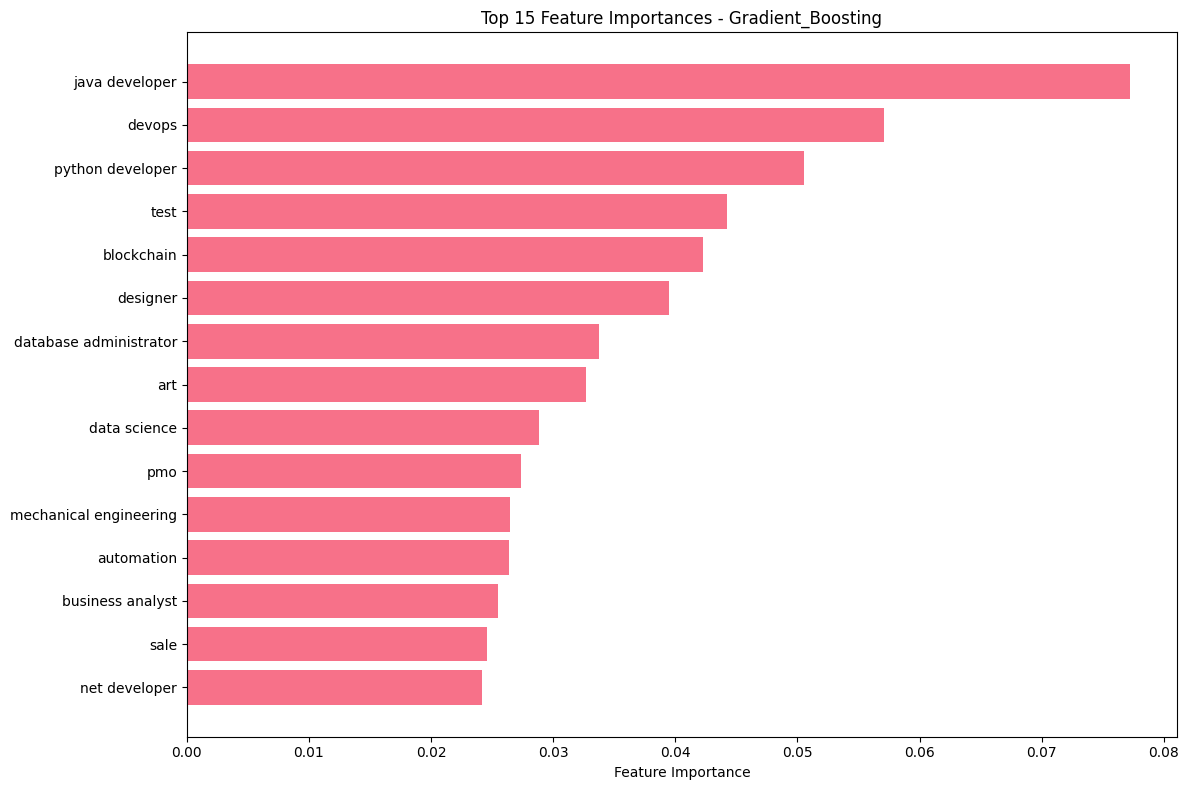

In [53]:
# Feature importance analysis for the best model
print("Feature Importance Analysis:")
print("="*30)

if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    importances = best_model.feature_importances_
    
    # Get feature names (handling different feature combinations)
    if best_model_name in ['svm_linear', 'svm_rbf']:
        feature_indices = np.argsort(importances)[-20:]
        print("Top 20 most important features:")
        for i, idx in enumerate(reversed(feature_indices)):
            print(f"{i+1:2d}. Feature {idx}: {importances[idx]:.4f}")
    else:
        # For full feature set models
        tfidf_features = feature_names['tfidf']
        additional_feature_names = list(additional_features_df.columns)
        all_feature_names = list(tfidf_features) + additional_feature_names
        
        feature_importance_df = pd.DataFrame({
            'feature': all_feature_names[:len(importances)],
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("Top 20 most important features:")
        print(feature_importance_df.head(20).to_string(index=False))
        
        # Visualize top features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance_df.head(15)
        plt.barh(range(len(top_features)), top_features['importance'].values)
        plt.yticks(range(len(top_features)), top_features['feature'].values)
        plt.xlabel('Feature Importance')
        plt.title(f'Top 15 Feature Importances - {best_model_name.title()}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

elif hasattr(best_model, 'coef_'):
    # Linear models
    coefficients = best_model.coef_
    if len(coefficients.shape) == 2:
        # Multi-class case - show average absolute coefficients
        avg_coef = np.mean(np.abs(coefficients), axis=0)
        feature_indices = np.argsort(avg_coef)[-20:]
        
        print("Top 20 features by average absolute coefficient:")
        if best_model_name in ['svm_linear']:
            for i, idx in enumerate(reversed(feature_indices)):
                print(f"{i+1:2d}. Feature {idx}: {avg_coef[idx]:.4f}")
        else:
            tfidf_features = feature_names['tfidf']
            additional_feature_names = list(additional_features_df.columns)
            all_feature_names = list(tfidf_features) + additional_feature_names
            
            for i, idx in enumerate(reversed(feature_indices)):
                if idx < len(all_feature_names):
                    print(f"{i+1:2d}. {all_feature_names[idx]:30s}: {avg_coef[idx]:.4f}")

else:
    print("Feature importance not available for this model type")


In [54]:
# Model comparison summary
print("MODEL COMPARISON SUMMARY:")
print("="*50)

# Combine baseline and tuned results
all_results = {}
all_results.update(baseline_results)
all_results.update({f"{k}_tuned": v for k, v in tuned_results.items()})

# Create comparison DataFrame
comparison_data = []
for name, results in all_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'CV_Mean': results['cv_mean'],
        'CV_Std': results['cv_std'],
        'Train_Time': results['training_time'],
        'Pred_Time': results['prediction_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print(comparison_df.to_string(index=False, float_format='%.4f'))

# Save the best model
model_filename = f'best_model_{best_model_name}.pkl'
joblib.dump(best_model, model_filename)

print(f"\nBest model saved as: {model_filename}")
print(f"Best model: {best_model_name}")
print(f"Final test accuracy: {best_model_results['accuracy']:.4f}")
print(f"Final test F1-score: {best_model_results['f1_score']:.4f}")


MODEL COMPARISON SUMMARY:
                    Model  Accuracy  Precision  Recall  F1-Score  CV_Mean  CV_Std  Train_Time  Pred_Time
        gradient_boosting    1.0000     1.0000  1.0000    1.0000   0.9948  0.0064     35.0076     0.0077
logistic_regression_tuned    0.9948     0.9957  0.9948    0.9949   0.9935  0.0058      0.3218     0.0005
            random_forest    0.9948     0.9957  0.9948    0.9949   0.9922  0.0049      0.1124     0.0171
  gradient_boosting_tuned    0.9948     0.9957  0.9948    0.9949   0.9961  0.0052     38.1319     0.0060
      logistic_regression    0.9948     0.9955  0.9948    0.9949   0.9623  0.0075      0.4264     0.0005
      random_forest_tuned    0.9948     0.9952  0.9948    0.9948   0.9922  0.0049      0.0962     0.0165
               svm_linear    0.0829     0.0077  0.0829    0.0142   0.0390  0.0109      0.1761     0.0058
                  svm_rbf    0.0829     0.0077  0.0829    0.0142   0.0429  0.0106      0.2637     0.0132
                      knn    

In [55]:
# Save model training results and metadata
training_metadata = {
    'best_model_name': best_model_name,
    'best_model_params': best_model_results.get('best_params', {}),
    'best_model_performance': {
        'accuracy': best_model_results['accuracy'],
        'precision': best_model_results['precision'],
        'recall': best_model_results['recall'],
        'f1_score': best_model_results['f1_score']
    },
    'feature_combination_used': 'tfidf_plus_features',
    'training_samples': X_train.shape[0],
    'test_samples': X_test.shape[0],
    'feature_dimensions': X_train.shape[1],
    'class_names': class_names.tolist(),
    'training_timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
}

# Save metadata
with open('training_metadata.pkl', 'wb') as f:
    pickle.dump(training_metadata, f)

# Save comparison results
comparison_df.to_csv('model_comparison_results.csv', index=False)

print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print("Saved artifacts:")
print(f"- Best model: {model_filename}")
print("- Training metadata: training_metadata.pkl")
print("- Model comparison: model_comparison_results.csv")
print("- Label encoder: label_encoder.pkl")
print("- Feature vectorizer: tfidf_vectorizer.pkl")
print("="*50)


MODEL TRAINING COMPLETED SUCCESSFULLY!
Saved artifacts:
- Best model: best_model_gradient_boosting.pkl
- Training metadata: training_metadata.pkl
- Model comparison: model_comparison_results.csv
- Label encoder: label_encoder.pkl
- Feature vectorizer: tfidf_vectorizer.pkl
